In [3]:
#base libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [4]:
#importing data 
df0 = pd.read_csv("regression_data_clean.csv")

# 0.0 Preliminary data cleaning

The goal here is to do all the preliminary data cleaning that will be mostly common to all the iterations 

In [5]:
df = df0.copy() #let's keep the raw data intact

In [6]:
#first look at the data
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [7]:
#column names seem to be quite clean, no work required => focusing on the content of each column

In [8]:
df.shape #checking data size

(21597, 21)

In [9]:
df.info() #we have only numerical data (with the exception of the date column), no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [10]:
df.nunique() #checking unique values => gives a preliminary idea of the split between continuous and discrete values

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [11]:
#no NaN values. Let's look at the data now
#all the data is numerical except for the date, which should be converted from object to date format
df["date"] = pd.to_datetime(df["date"])

In [12]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [13]:
df["yr_renovated"].value_counts() #seems like there are a lot of zeros for this column => missing data

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
#the column "yr_renovated" is pretty useless because it's missing too much data, let's drop it
df.drop(columns = ["yr_renovated"], inplace = True)

In [15]:
#let's count the "0" in all the columns, to check that there is nothing unusual
df.isin([0]).sum()

id                   0
date                 0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront       21434
view             19475
condition            0
grade                0
sqft_above           0
sqft_basement    13110
yr_built             0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
price                0
dtype: int64

In [16]:
#everything seems to be fine, the zeros are in columns where they are expected to be => no missing data

In [17]:
#the columns "sqft_above" and "sqft_basement" bring us no value => their sum is equal to the column "sqft_living"
#let's just use them to indicate if the house has a basement or not and turn them into a binary variable
#we could have also simply removed one the 2 columns, because 2 columns in total (including sqft_living)give exactly the same level of information as 3. But since there are so many houses with no basement, that we can just turn this into a binary variable, with or without basement 
#defining a quick function that will allow us to identify the existence of a basement or not:
def f(x):
    n = 1
    if x == 0:
        n = 0
    return n
df["with_basement"] = df["sqft_basement"].apply(f) #creating a new column with the binary variable

df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,with_basement
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,221900,0
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,538000,1
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,180000,0
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,604000,1
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,510000,0


In [18]:
df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price', 'with_basement'],
      dtype='object')

In [19]:
#let's rearrange the columns
new_columns = ['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'with_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'price']

df = df[new_columns]
df.head()


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,with_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1955,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1,1951,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,1933,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1,1965,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,1987,98074,47.6168,-122.045,1800,7503,510000


In [20]:
#we can now drop the columns"sqft_above" and "sqft_basement"
df.drop(columns = ["sqft_above","sqft_basement"], inplace = True)

In [21]:
#!!NB!!: only 10-20% of houses seem to have the same sqft_living and sqft_lot as in 2015. So it would be fair to assume that all this renovation work happened before the house sale, given that the sale date is 2014/2015.
#Assumption: let's replace the data from sqft_living and lot with the data from sqft_living15 and sqft_lot15

df["sqft_living"] = df["sqft_living15"]
df["sqft_lot"] = df["sqft_lot15"]

In [22]:
#we can now drop the duplicate columns
df.drop(columns = ["sqft_living15", "sqft_lot15"], inplace = True)

In [23]:
#finally, let's drop "lat" and "long" for now, as they are grossly contained in the zipcode. Let's also drop the "id" column, which is completely useless
df.drop(columns = ["lat", "long"], inplace = True)

In [24]:
df.drop(columns = ["id"], inplace = True)

In [25]:
#let's also drop the "date" column. The assumption is that the period (2014, 2015) is too short and uneventful to have any impact on the price.
#we can always bring it in afterwards and encode it ordinally
df.drop(columns = ["date"], inplace = True)

In [26]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built,zipcode,price
0,3,1.00,1340,5650,1.0,0,0,3,7,0,1955,98178,221900
1,3,2.25,1690,7639,2.0,0,0,3,7,1,1951,98125,538000
2,2,1.00,2720,8062,1.0,0,0,3,6,0,1933,98028,180000
3,4,3.00,1360,5000,1.0,0,0,5,7,1,1965,98136,604000
4,3,2.00,1800,7503,1.0,0,0,3,8,0,1987,98074,510000


In [27]:
#let's take a look at the data we want to model (i.e. price)
df["price"].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

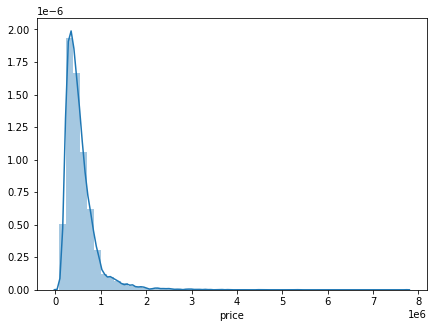

In [28]:
#looks from the above that the prices are a little skewed to the right (mean > median). Let's check it out
plt.figure(figsize=(7, 5))
sns.distplot(df["price"], bins=50)

A quick check of the data in SQL shows us that the tail to the right corresponds to the 40+ properties that were sold more than 3Million. We should keep those in the model as they provide very valuable information 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1240be880>,
      dtype=object)

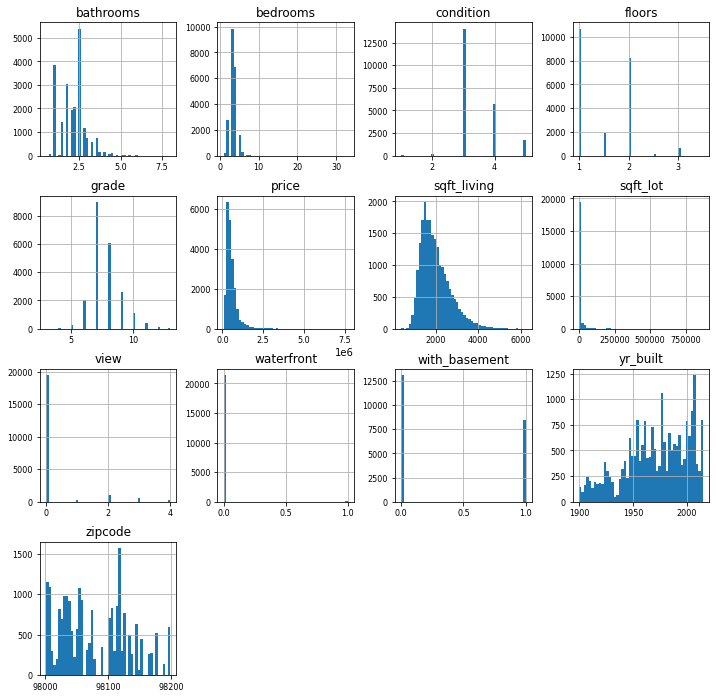

In [29]:
#Let's take a look at all our variables to identify any inconsisdtencies / outliers
df.hist(figsize=(12, 12), bins=50, xlabelsize=8, ylabelsize=8)

In [30]:
#bedrooms: the property with 33 bedrooms is obviously an outlier: low price, less than 2 bathrooms, small living space, let's drop it
df.drop(df.loc[df["bedrooms"]==33].index, inplace=True)

In [31]:
df.shape

(21596, 13)

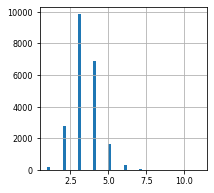

In [32]:
df["bedrooms"].hist(figsize=(3, 3), bins=50, xlabelsize=8, ylabelsize=8) #just checking

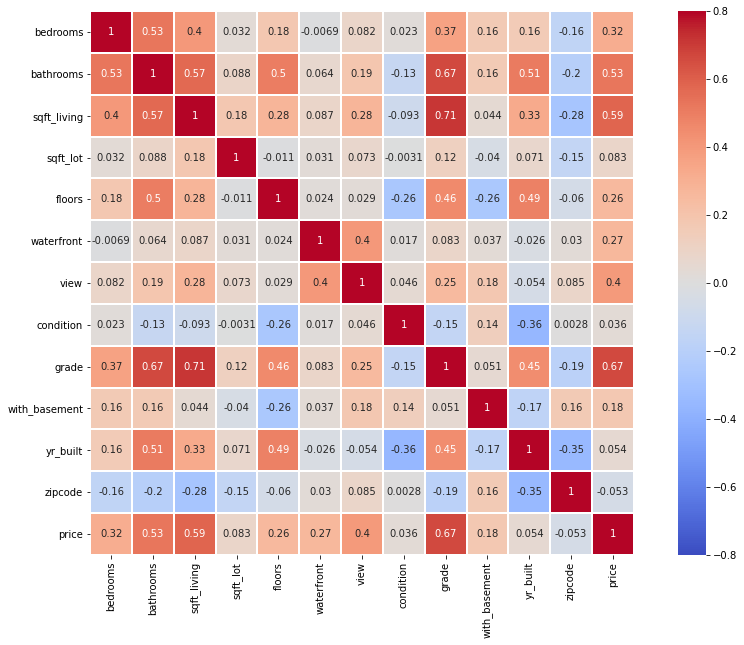

In [33]:
#let's take a look at correlations 
f, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(df.corr(),
                     square=True, annot = True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

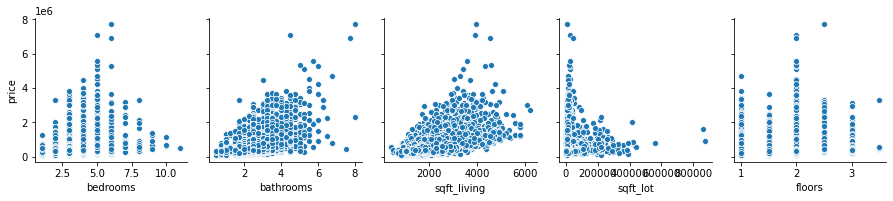

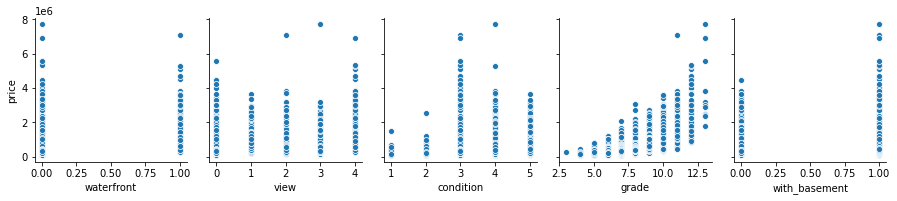

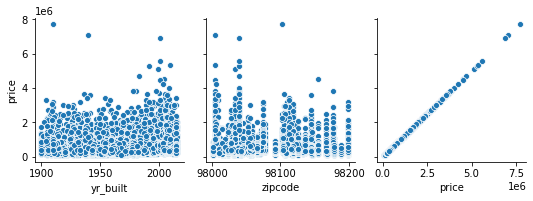

In [34]:
#Finally, let's visualize the correlation of each column with price
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=["price"])

# 0.1 Setting up our tools

The goal of this section is to get all the models and their evaluations ready for each of the iterations we will be doing 

In [35]:
#importing models we will run:
from sklearn.model_selection import train_test_split as tts #import train_test_split

from sklearn.linear_model import LinearRegression as LinReg #import linear regression

from sklearn.linear_model import Lasso # import regularization 1/3      
from sklearn.linear_model import Ridge # import regularization 2/3      
from sklearn.linear_model import ElasticNet # import regularization 3/3

from sklearn.ensemble import RandomForestRegressor as RFR #import random forest regressor

In [36]:
#importing model evaluation tools:
from sklearn.metrics import mean_squared_error as mse #MSE
from sklearn.metrics import mean_absolute_error as mae #MAE

In [43]:
#let's define a function that runs all our models. This will happen after we do the train-test split

def run_models(a,b,c,d): #a,b,c,d sont respectivement X_train, y_train, X_test, y_test
    
    model_names=["linreg", "lasso", "ridge", "elastic", "rfr"] #this will become the first column of our dataframe
    Res = pd.DataFrame({"model":[0,0,0,0,0], "R2":[0,0,0,0,0], "R2A":[0,0,0,0,0], "MSE":[0,0,0,0,0], "RMSE":[0,0,0,0,0], "MAE":[0,0,0,0,0]})#initializing "results" dataframe
    Res["model"] = model_names #filling the first columns
    
    #Running the models:
    #linreg
    linreg=LinReg()    
    linreg.fit(a, b)   
    y_pred_linreg=linreg.predict(c)
    #lasso
    lasso=Lasso()
    lasso.fit(a, b)
    y_pred_lasso=lasso.predict(c)
    #ridge
    ridge=Ridge()
    ridge.fit(a, b)
    y_pred_ridge=ridge.predict(c)
    #elasticnet
    elastic=ElasticNet()
    elastic.fit(a, b)
    y_pred_elastic=elastic.predict(c)
    #random forst regressor
    rfr=RFR()
    rfr.fit(a, b)
    y_pred_rfr=rfr.predict(c)
    
    #defining 2 lists that will be our iterables for completing the Res dataframe:
    models=[linreg, lasso, ridge, elastic, rfr]
    preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr]
    
    #for loop to fill out the dataframe
    for i in range(len(models)):
        Res.loc[i,"R2"] = round(models[i].score(c, d),2)
        Res.loc[i,"R2A"] = round(1 - (1-models[i].score(c, d))*(len(d)-1)/(len(d)-c.shape[1]-1),2) #R2 adjusted
        Res.loc[i,"MSE"] = "{:.2e}".format(mse(preds[i], d))
        Res.loc[i,"RMSE"] = "{:.2e}".format(mse(preds[i], d)**0.5)
        Res.loc[i,"MAE"] = "{:.2e}".format(mae(preds[i], d))
        
    return Res

# 1.0 test run!

In [44]:
#the goal here is to just check that our function is working properly. let's drop all columns except sqft_living and bathrooms
df_test = df[["sqft_living", "bathrooms", "price"]].copy()
df_test.head()

,sqft_living,bathrooms,price
0,1340,1.00,221900
1,1690,2.25,538000
2,2720,1.00,180000
3,1360,3.00,604000
4,1800,2.00,510000


In [45]:
X=df_test[["sqft_living", "bathrooms"]]
y=df_test["price"]
#just checking:
print(X.shape)
print(y.shape)

(21596, 2)
(21596,)


In [46]:
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2, random_state=40) #test size 20%

In [47]:
run_models(X_train, y_train, X_test, y_test)

,model,R2,R2A,MSE,RMSE,MAE
0,linreg,0.42,0.42,7.77e+10,2.79e+05,1.80e+05
1,lasso,0.42,0.42,7.77e+10,2.79e+05,1.80e+05
2,ridge,0.42,0.42,7.77e+10,2.79e+05,1.80e+05
3,elastic,0.41,0.40,8.00e+10,2.83e+05,1.78e+05
4,rfr,0.42,0.42,7.81e+10,2.79e+05,1.80e+05


In [42]:
#YES

#  1.1 First run 

In [251]:
df1 = df.copy()

Assumptions for this iteration: <br>
1.a/ the previous heatmap shows that "sqft_lot" and "condition" have almost no correlation to price, let's drop them from df1 <br>
1.b/ we will deal with "yr_built", and "zipcode" in following iterations <br>
1.c/ "grade" correlates highly with "sqft_living" and "bathrooms", plus it is an arbitrary rating system. Let's try without it in this iteration <br>
1.d/ no scaling, standardizing, or normalizing

In [252]:
df1.drop(columns = ["sqft_lot","grade", "condition"], inplace = True)

In [253]:
df1.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,with_basement,yr_built,zipcode,price
0,3,1.00,1340,1.0,0,0,0,1955,98178,221900
1,3,2.25,1690,2.0,0,0,1,1951,98125,538000
2,2,1.00,2720,1.0,0,0,0,1933,98028,180000
3,4,3.00,1360,1.0,0,0,1,1965,98136,604000
4,3,2.00,1800,1.0,0,0,0,1987,98074,510000


In [254]:
#defining learning vs testing variables

X1=df1.drop(columns=["yr_built","zipcode","price"]) 
y1=df1["price"]

# checking shape
print(X1.shape)
print(y1.shape)

(21596, 7)
(21596,)


In [255]:
X1_train, X1_test, y1_train, y1_test=tts(X1, y1, test_size=0.2, random_state=40) #test size 20%

In [256]:
run_models(X1_train, y1_train, X1_test, y1_test)

,model,R2,R2A,MSE,RMSE,MAE
0,linreg,0.49,0.49,6.82e+10,2.61e+05,1.69e+05
1,lasso,0.49,0.49,6.82e+10,2.61e+05,1.69e+05
2,ridge,0.49,0.49,6.82e+10,2.61e+05,1.69e+05
3,elastic,0.45,0.45,7.34e+10,2.71e+05,1.70e+05
4,rfr,0.53,0.53,6.32e+10,2.51e+05,1.62e+05


#  1.2  2nd run 


In [67]:
df2 = df.copy()

In [68]:
df2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built,zipcode,price
0,3,1.00,1340,5650,1.0,0,0,3,7,0,1955,98178,221900
1,3,2.25,1690,7639,2.0,0,0,3,7,1,1951,98125,538000
2,2,1.00,2720,8062,1.0,0,0,3,6,0,1933,98028,180000
3,4,3.00,1360,5000,1.0,0,0,5,7,1,1965,98136,604000
4,3,2.00,1800,7503,1.0,0,0,3,8,0,1987,98074,510000


In [ ]:
#let's keep "sqft_lot", "condition","grade" and "yr_built" this time

In [81]:
#defining learning vs testing variables

X2=df2.drop(columns=["zipcode","price"]) 
y2=df2["price"]

In [82]:
X2_train, X2_test, y2_train, y2_test=tts(X2, y2, test_size=0.2, random_state=40) #test size 20%

In [83]:
run_models(X2_train, y2_train, X2_test, y2_test)

,model,R2,R2A,MSE,RMSE,MAE
0,linreg,0.63,0.63,4.93e+10,2.22e+05,1.41e+05
1,lasso,0.63,0.63,4.93e+10,2.22e+05,1.41e+05
2,ridge,0.63,0.63,4.93e+10,2.22e+05,1.41e+05
3,elastic,0.58,0.58,5.60e+10,2.37e+05,1.43e+05
4,rfr,0.74,0.74,3.53e+10,1.88e+05,1.14e+05


# 1.3 3rd run

In [65]:
df3 = df.copy()

In [66]:
df3.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built,zipcode,price
0,3,1.00,1340,5650,1.0,0,0,3,7,0,1955,98178,221900
1,3,2.25,1690,7639,2.0,0,0,3,7,1,1951,98125,538000
2,2,1.00,2720,8062,1.0,0,0,3,6,0,1933,98028,180000
3,4,3.00,1360,5000,1.0,0,0,5,7,1,1965,98136,604000
4,3,2.00,1800,7503,1.0,0,0,3,8,0,1987,98074,510000


In [76]:
#In this run, let's consider that all the data is numerical except "zipcode", and let's explore some pre-processing options
df3_num = df3.drop(columns = ["zipcode"])
df3_num.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built,price
0,3,1.00,1340,5650,1.0,0,0,3,7,0,1955,221900
1,3,2.25,1690,7639,2.0,0,0,3,7,1,1951,538000
2,2,1.00,2720,8062,1.0,0,0,3,6,0,1933,180000
3,4,3.00,1360,5000,1.0,0,0,5,7,1,1965,604000
4,3,2.00,1800,7503,1.0,0,0,3,8,0,1987,510000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12838dac0>,
      dtype=object)

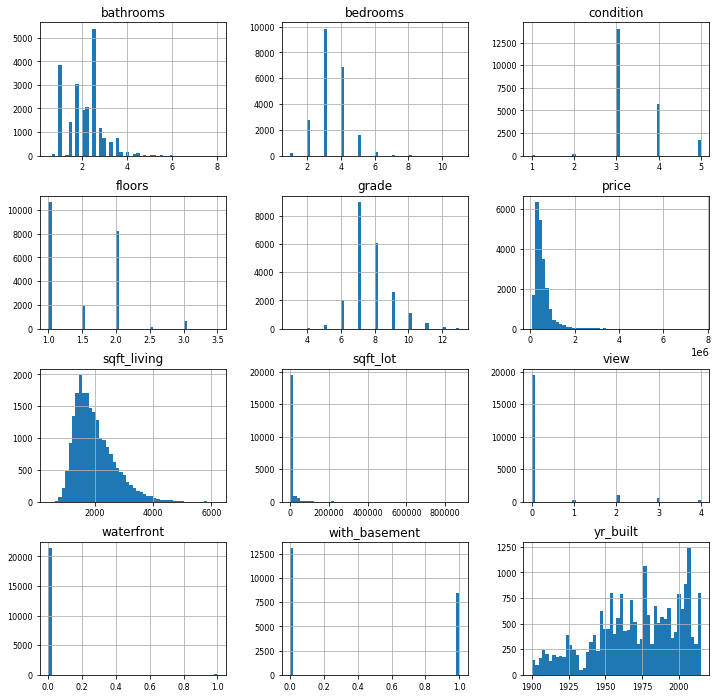

In [77]:
#let's look at our numerical values again
df3_num.hist(figsize=(12, 12), bins=50, xlabelsize=8, ylabelsize=8)

In [86]:
#sqft_lot is a good candidate for log transformation: we want to dilate everything towards 0 and "compress" towards high values
def log_transform_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN

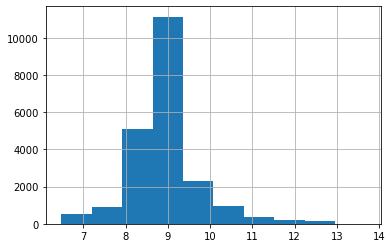

In [87]:
pd.Series(map(log_transform_clean_, df3_num["sqft_lot"])).hist() #let's check the new distribution => much better

In [88]:
df3["sqft_lot"] = list(map(log_transfom_clean_, df3["sqft_lot"]))

In [89]:
df3_num = df3.drop(columns = ["zipcode"])

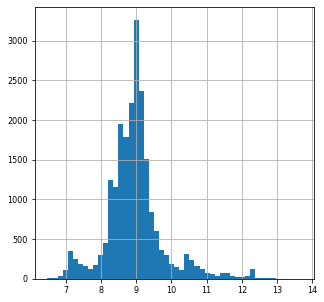

In [91]:
df3_num["sqft_lot"].hist(figsize=(5, 5), bins=50, xlabelsize=8, ylabelsize=8)

In [92]:
df3_num.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built,price
0,3,1.00,1340,8.639411,1.0,0,0,3,7,0,1955,221900
1,3,2.25,1690,8.941022,2.0,0,0,3,7,1,1951,538000
2,2,1.00,2720,8.994917,1.0,0,0,3,6,0,1933,180000
3,4,3.00,1360,8.517193,1.0,0,0,5,7,1,1965,604000
4,3,2.00,1800,8.923058,1.0,0,0,3,8,0,1987,510000


In [100]:
X3 = df3_num.drop(columns = ["price"])
y3 = df3_num["price"]

In [101]:
X3_train, X3_test, y3_train, y3_test=tts(X3, y3, test_size=0.2, random_state=40) #test size 20%

In [102]:
run_models(X3_train, y3_train, X3_test, y3_test)

,model,R2,R2A,MSE,RMSE,MAE
0,linreg,0.63,0.63,4.91e+10,2.22e+05,1.40e+05
1,lasso,0.63,0.63,4.91e+10,2.22e+05,1.40e+05
2,ridge,0.63,0.63,4.91e+10,2.22e+05,1.40e+05
3,elastic,0.59,0.58,5.58e+10,2.36e+05,1.42e+05
4,rfr,0.74,0.74,3.53e+10,1.88e+05,1.15e+05


# 1.4 4th run

In [ ]:
#let's keep working with the data from the 3rd, but let's normalize this time

In [104]:
df4 = df3.copy()
df4.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built,zipcode,price
0,3,1.00,1340,8.639411,1.0,0,0,3,7,0,1955,98178,221900
1,3,2.25,1690,8.941022,2.0,0,0,3,7,1,1951,98125,538000
2,2,1.00,2720,8.994917,1.0,0,0,3,6,0,1933,98028,180000
3,4,3.00,1360,8.517193,1.0,0,0,5,7,1,1965,98136,604000
4,3,2.00,1800,8.923058,1.0,0,0,3,8,0,1987,98074,510000


In [105]:
df4_num=df4.drop(columns = ["zipcode", "price"])

In [109]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(df4_num)
x4_standardized = transformer.transform(df4_num)
print(x4_standardized.shape)

(21596, 11)


In [115]:
X4 = pd.DataFrame(x4_standardized)
y4 = df4["price"]

In [116]:
X4_train, X4_test, y4_train, y4_test=tts(X4, y4, test_size=0.2, random_state=40) #test size 20%

In [117]:
run_models(X4_train, y4_train, X4_test, y4_test)

,model,R2,R2A,MSE,RMSE,MAE
0,linreg,0.63,0.63,4.91e+10,2.22e+05,1.40e+05
1,lasso,0.63,0.63,4.91e+10,2.22e+05,1.40e+05
2,ridge,0.63,0.63,4.91e+10,2.22e+05,1.40e+05
3,elastic,0.58,0.58,5.61e+10,2.37e+05,1.42e+05
4,rfr,0.73,0.73,3.60e+10,1.90e+05,1.15e+05


# 1.5 5th run

In [203]:
#let's keep the previous + box_cox all numeric columns
df5 = df4.copy()

In [204]:
df5_num=df5.drop(columns = ["zipcode", "price"])

In [205]:
df5_num.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built
0,3,1.00,1340,8.639411,1.0,0,0,3,7,0,1955
1,3,2.25,1690,8.941022,2.0,0,0,3,7,1,1951
2,2,1.00,2720,8.994917,1.0,0,0,3,6,0,1933
3,4,3.00,1360,8.517193,1.0,0,0,5,7,1,1965
4,3,2.00,1800,8.923058,1.0,0,0,3,8,0,1987


In [206]:
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
df5_bis = df5_num.drop(columns = ["view", "waterfront","with_basement", "yr_built"])
pt.fit_transform(df5_bis) #removing binary variables as box-cox requires strictly positive data
df5_num_cont = pd.DataFrame(pt.fit_transform(df5_bis))

In [207]:
df5_num_cont.head()

,0,1,2,3,4,5,6
0,1.541511,0.000000,3.505447,1.079963,0.000000,0.936034,1.400984
1,1.541511,1.015126,3.548161,1.086879,0.543524,0.936034,1.400984
2,0.854882,0.000000,3.628902,1.088072,0.000000,0.936034,1.322083
3,2.137560,1.494880,3.508243,1.077040,0.000000,1.276770,1.400984
4,1.541511,0.839025,3.559377,1.086478,0.000000,0.936034,1.465894


In [208]:
X5 = np.concatenate((df5_num_cont, df5_num[["view", "waterfront","with_basement", "yr_built"]]), axis=1)
y5 = df5["price"]

In [209]:
X5_train, X5_test, y5_train, y5_test=tts(X5, y5, test_size=0.2, random_state=40)

In [210]:
run_models(X5_train, y5_train, X5_test, y5_test)

,model,R2,R2A,MSE,RMSE,MAE
0,linreg,0.57,0.57,5.74e+10,2.40e+05,1.49e+05
1,lasso,0.57,0.57,5.74e+10,2.40e+05,1.49e+05
2,ridge,0.57,0.57,5.75e+10,2.40e+05,1.49e+05
3,elastic,0.28,0.28,9.65e+10,3.11e+05,1.94e+05
4,rfr,0.73,0.73,3.58e+10,1.89e+05,1.15e+05


In [ ]:
#ok that was bad, let's rerun this while applying box_cox only where it seems adapted, i.e.: 

# 1.5.2 5th run - adjusted

In [213]:
df5_2 = df4.copy()

In [214]:
df5_2_num=df5.drop(columns = ["zipcode", "price"])

In [215]:
df5_2_num.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built
0,3,1.00,1340,8.639411,1.0,0,0,3,7,0,1955
1,3,2.25,1690,8.941022,2.0,0,0,3,7,1,1951
2,2,1.00,2720,8.994917,1.0,0,0,3,6,0,1933
3,4,3.00,1360,8.517193,1.0,0,0,5,7,1,1965
4,3,2.00,1800,8.923058,1.0,0,0,3,8,0,1987


In [216]:
#and now we apply box-cox only to sqft_living and sqft_lot
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
df5_2_bis = df5_2_num.drop(columns = ["view", "waterfront","with_basement","yr_built"])
pt.fit_transform(df5_2_bis) #removing binary variables as box-cox requires strictly positive data
df5_2_num_cont = pd.DataFrame(pt.fit_transform(df5_2_bis))

In [217]:
df5_2_num_cont.head()

,0,1,2,3,4,5,6
0,1.541511,0.000000,3.505447,1.079963,0.000000,0.936034,1.400984
1,1.541511,1.015126,3.548161,1.086879,0.543524,0.936034,1.400984
2,0.854882,0.000000,3.628902,1.088072,0.000000,0.936034,1.322083
3,2.137560,1.494880,3.508243,1.077040,0.000000,1.276770,1.400984
4,1.541511,0.839025,3.559377,1.086478,0.000000,0.936034,1.465894


In [218]:
X5_2 = np.concatenate((df5_2_num_cont, df5_2_num[["view", "waterfront","with_basement","yr_built"]]), axis=1)
y5_2 = df5_2["price"]

In [219]:
X5_2_train, X5_2_test, y5_2_train, y5_2_test=tts(X5_2, y5_2, test_size=0.2, random_state=40)

In [220]:
run_models(X5_2_train, y5_2_train, X5_2_test, y5_2_test)

,model,R2,R2A,MSE,RMSE,MAE
0,linreg,0.57,0.57,5.74e+10,2.40e+05,1.49e+05
1,lasso,0.57,0.57,5.74e+10,2.40e+05,1.49e+05
2,ridge,0.57,0.57,5.75e+10,2.40e+05,1.49e+05
3,elastic,0.28,0.28,9.65e+10,3.11e+05,1.94e+05
4,rfr,0.74,0.74,3.52e+10,1.88e+05,1.15e+05


In [ ]:
#nope, pretty mych useless

# 1.6 6th run - dealing with discrete values - "yr_built"

In [221]:
df6 = df3.copy() #let's use the data from df3, before we scaled but after we applied the log correction to the sqft_lot
df6.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built,zipcode,price
0,3,1.00,1340,8.639411,1.0,0,0,3,7,0,1955,98178,221900
1,3,2.25,1690,8.941022,2.0,0,0,3,7,1,1951,98125,538000
2,2,1.00,2720,8.994917,1.0,0,0,3,6,0,1933,98028,180000
3,4,3.00,1360,8.517193,1.0,0,0,5,7,1,1965,98136,604000
4,3,2.00,1800,8.923058,1.0,0,0,3,8,0,1987,98074,510000


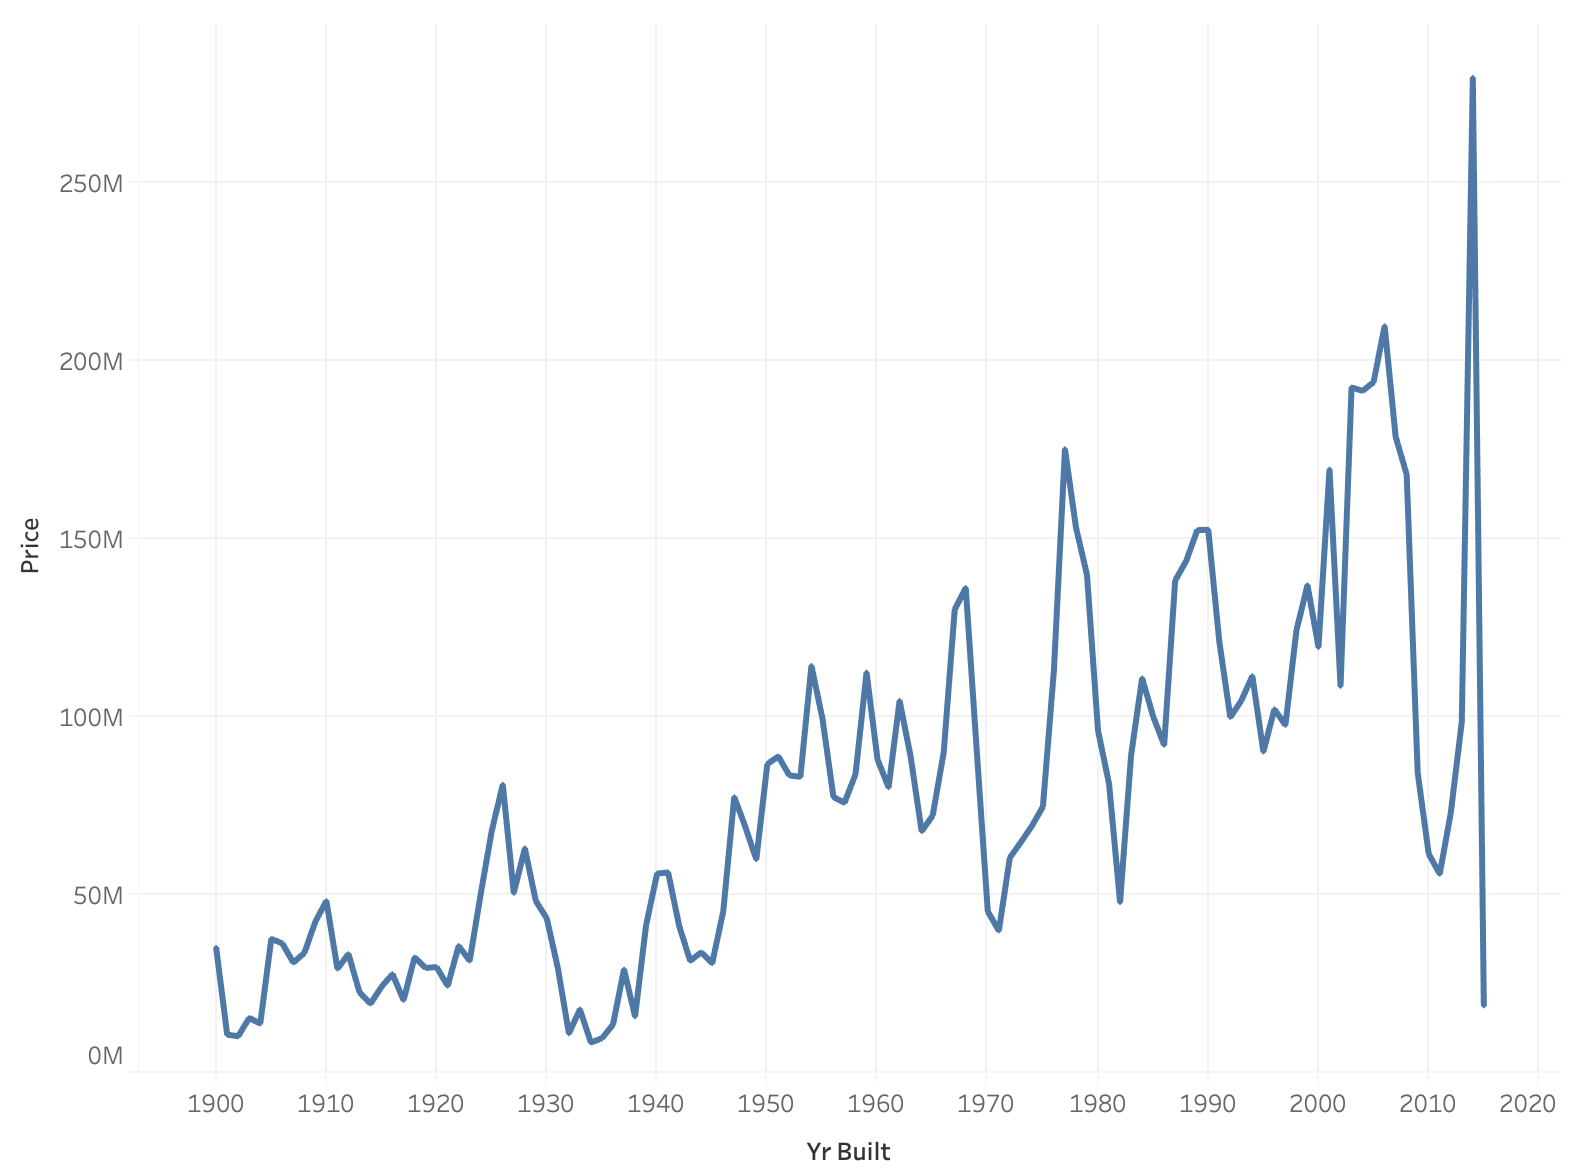

In [152]:
#let's start with the "yr_built" column

from IPython.display import Image
Image("tableau_price_yr_built.png")

In [222]:
#the above chart suggests the following bucketing, for which we will define a function:
def bucket_yr_built(x) :
    n = 0
    if (x >= 1900) and (x < 1950):
        n = "period_1"
    elif (x >= 1950) and (x < 2000):
        n = "period_2"
    else: n = "period_3"
    return n

In [223]:
df6.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'with_basement', 'yr_built',
       'zipcode', 'price'],
      dtype='object')

In [224]:
df6["yr_built_cat"] = df6["yr_built"].apply(bucket_yr_built) # creating our new categorical column

In [225]:
new_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'with_basement', 'yr_built', 'yr_built_cat',
       'zipcode', 'price']
df6 = df6[new_cols] #rearranging columns

In [226]:
df6.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built,yr_built_cat,zipcode,price
0,3,1.00,1340,8.639411,1.0,0,0,3,7,0,1955,period_2,98178,221900
1,3,2.25,1690,8.941022,2.0,0,0,3,7,1,1951,period_2,98125,538000
2,2,1.00,2720,8.994917,1.0,0,0,3,6,0,1933,period_1,98028,180000
3,4,3.00,1360,8.517193,1.0,0,0,5,7,1,1965,period_2,98136,604000
4,3,2.00,1800,8.923058,1.0,0,0,3,8,0,1987,period_2,98074,510000


In [167]:
df6["yr_built_cat"].isin([0]).sum() #checking for zeros

0

In [227]:
df6.drop(columns = ["yr_built"], inplace = True)

In [228]:
df6.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built_cat,zipcode,price
0,3,1.00,1340,8.639411,1.0,0,0,3,7,0,period_2,98178,221900
1,3,2.25,1690,8.941022,2.0,0,0,3,7,1,period_2,98125,538000
2,2,1.00,2720,8.994917,1.0,0,0,3,6,0,period_1,98028,180000
3,4,3.00,1360,8.517193,1.0,0,0,5,7,1,period_2,98136,604000
4,3,2.00,1800,8.923058,1.0,0,0,3,8,0,period_2,98074,510000


In [229]:
#now let's encode "yr_built_cat" and turn into (3-1) binary columns
one_hot_df6=pd.get_dummies(df6["yr_built_cat"], drop_first=True)

In [230]:
one_hot_df6.head() #checking

,period_2,period_3
0,1,0
1,1,0
2,0,0
3,1,0
4,1,0


In [231]:
df6=pd.concat([df6, one_hot_df6], axis=1)   # concat dataframes 
df6.drop(columns=["yr_built_cat"], inplace=True)

In [232]:
df6.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,zipcode,price,period_2,period_3
0,3,1.00,1340,8.639411,1.0,0,0,3,7,0,98178,221900,1,0
1,3,2.25,1690,8.941022,2.0,0,0,3,7,1,98125,538000,1,0
2,2,1.00,2720,8.994917,1.0,0,0,3,6,0,98028,180000,0,0
3,4,3.00,1360,8.517193,1.0,0,0,5,7,1,98136,604000,1,0
4,3,2.00,1800,8.923058,1.0,0,0,3,8,0,98074,510000,1,0


In [233]:
#let's run the model once without preprocessing:
X6 = df6.drop(columns = ["zipcode", "price"])
y6 = df6["price"]

In [234]:
X6_train, X6_test, y6_train, y6_test=tts(X6, y6, test_size=0.2, random_state=40)

In [235]:
run_models(X6_train, y6_train, X6_test, y6_test)

,model,R2,R2A,MSE,RMSE,MAE
0,linreg,0.62,0.62,5.10e+10,2.26e+05,1.44e+05
1,lasso,0.62,0.62,5.10e+10,2.26e+05,1.44e+05
2,ridge,0.62,0.62,5.10e+10,2.26e+05,1.44e+05
3,elastic,0.54,0.54,6.15e+10,2.48e+05,1.53e+05
4,rfr,0.71,0.71,3.91e+10,1.98e+05,1.22e+05


In [236]:
#sadly, this did not improve our model that much...

# 1.6.2 6th run - "yr_built" - adjusted

In [ ]:
#let's skip the bucketing and just encode!

In [237]:
df6_2 = df3.copy()

In [238]:
one_hot_df6_2=pd.get_dummies(df6_2["yr_built"], drop_first=True)

In [239]:
one_hot_df6_2.head()

,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [240]:
df6_2=pd.concat([df6_2, one_hot_df6_2], axis=1)   # concat dataframes 
df6_2.drop(columns=["yr_built"], inplace=True)

In [242]:
df6_2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,zipcode,price,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,3,1.00,1340,8.639411,1.0,0,0,3,7,0,98178,221900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,2.25,1690,8.941022,2.0,0,0,3,7,1,98125,538000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1.00,2720,8.994917,1.0,0,0,3,6,0,98028,180000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1360,8.517193,1.0,0,0,5,7,1,98136,604000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1800,8.923058,1.0,0,0,3,8,0,98074,510000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [241]:
#defining our X and y
X6_2 = df6_2.drop(columns = ["zipcode", "price"])
y6_2 = df6_2["price"]

In [243]:
#train-test-split
X6_2_train, X6_2_test, y6_2_train, y6_2_test=tts(X6_2, y6_2, test_size=0.2, random_state=40)

In [244]:
run_models(X6_2_train, y6_2_train, X6_2_test, y6_2_test)

,model,R2,R2A,MSE,RMSE,MAE
0,linreg,0.64,0.63,4.79e+10,2.19e+05,1.39e+05
1,lasso,0.64,0.63,4.79e+10,2.19e+05,1.39e+05
2,ridge,0.64,0.63,4.79e+10,2.19e+05,1.39e+05
3,elastic,0.53,0.52,6.27e+10,2.50e+05,1.56e+05
4,rfr,0.70,0.69,4.09e+10,2.02e+05,1.22e+05


In [257]:
#Interesting = in the case of yr_built, adding 70 columns of binary data does not improve the model!
# this is not necessarily surpring, because there was acutally a positive linear correlation between price and yr_built
#however, it might make sense to include the zipcode column and do the same on it because it is truly "categorical". It also less unique values than "yr_built" so should be ok 

#  1.6.3 7th run - dealing with discrete values - "zipcode"

In [259]:
df7 = df3.copy() #again, let's start with our df3 data, which has log correction applied to sqrft_lot

In [260]:
df7.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built,zipcode,price
0,3,1.00,1340,8.639411,1.0,0,0,3,7,0,1955,98178,221900
1,3,2.25,1690,8.941022,2.0,0,0,3,7,1,1951,98125,538000
2,2,1.00,2720,8.994917,1.0,0,0,3,6,0,1933,98028,180000
3,4,3.00,1360,8.517193,1.0,0,0,5,7,1,1965,98136,604000
4,3,2.00,1800,8.923058,1.0,0,0,3,8,0,1987,98074,510000


In [261]:
one_hot_df7=pd.get_dummies(df7["zipcode"], drop_first=True)

In [262]:
df7=pd.concat([df7, one_hot_df7], axis=1)   # concat dataframes 
df7.drop(columns=["zipcode"], inplace=True)

In [263]:
df7.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,with_basement,yr_built,price,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1.00,1340,8.639411,1.0,0,0,3,7,0,1955,221900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3,2.25,1690,8.941022,2.0,0,0,3,7,1,1951,538000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1.00,2720,8.994917,1.0,0,0,3,6,0,1933,180000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1360,8.517193,1.0,0,0,5,7,1,1965,604000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1800,8.923058,1.0,0,0,3,8,0,1987,510000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [264]:
#defining our X and y
X7 = df7.drop(columns = ["price"])
y7 = df7["price"]

In [265]:
#train-test split
X7_train, X7_test, y7_train, y7_test=tts(X7, y7, test_size=0.2, random_state=40)

In [266]:
run_models(X7_train, y7_train, X7_test, y7_test)

,model,R2,R2A,MSE,RMSE,MAE
0,linreg,0.78,0.77,3.00e+10,1.73e+05,1.03e+05
1,lasso,0.78,0.77,3.00e+10,1.73e+05,1.03e+05
2,ridge,0.78,0.77,3.00e+10,1.73e+05,1.03e+05
3,elastic,0.59,0.58,5.49e+10,2.34e+05,1.40e+05
4,rfr,0.83,0.82,2.35e+10,1.53e+05,8.43e+04


In [267]:
#YYYAAAAAASSSSSS!

In [ ]:
#HERE IS WHAT WE'RE GONNA DO:
# maximise the R2 (and others) for the linear regression (cat data + normalization): assumption: if it improves a model, it improves all of them
# come up with a systematic modelling and testing + assessing function for all the regression models
# do KNN

In [ ]:
#preliminary suggestion: frop the zipcodes for the first iteration, then we'll try to include them in a KNN approach
#and we will probably encode them differently, by binning to a limited number of categories
#we will also need to change the date to ordinal
#CHECK THIS OUT: https://github.com/student-IH-labs-and-stuff/BER-DAFT-OCT20-Sian/blob/main/Solutions/Labs/unit-1/2_pandas/1.10_lab_customer_analysis_8_final_round_solution.md
#remaining: 
    #encode date, yr_built and zipcode
    #bring back waterfront
    #scale, normalise, box-cox
    #split train_test
    #run 3 different regression models
    #run a KNN model



In [ ]:
#Sian's notes

#what pre processing can we do with our features?
# Missing values- replace with mean, drop, impute
# identify outliers and remove them
# binarise cat data into columns - using dummies or binarize tool
# bucket data into categories
# convert cat to num by encoding strings - OHE, label
# scale numeric features incl scaler, log
# normalize - optional!
# standardise - optional! (transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1)
# Custom transformations

#only then, do your train-test split